In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


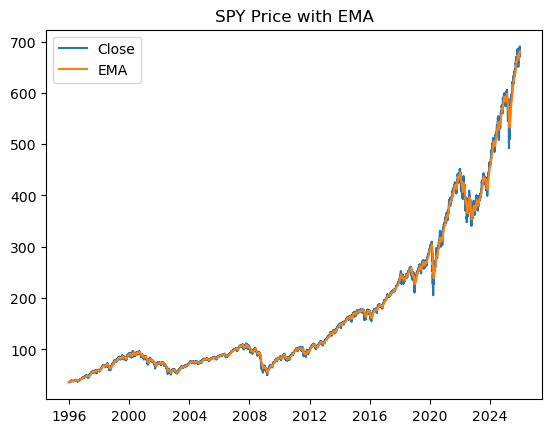

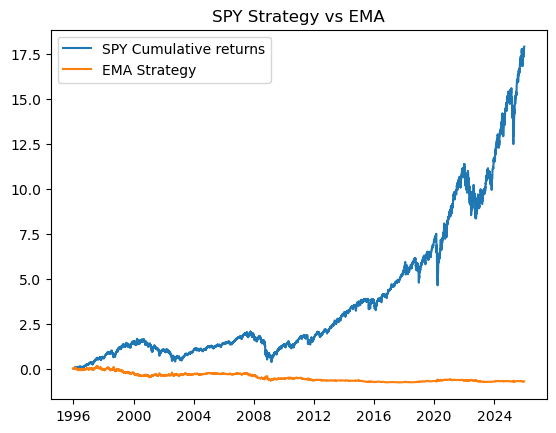

Price,Close,High,Low,Open,Volume,EMA,signal,position,asset_cumulative,strategy_cumulative
Date,,,,,,,,,,
1995-12-28,36.477680,36.626190,36.384862,36.440553,256200,36.511252,-1,-1.0,-0.001016,0.001016
1995-12-29,36.524078,36.551924,36.384851,36.514797,339200,36.512473,1,-1.0,0.000254,-0.000257
1996-01-02,36.913902,36.913902,36.440528,36.477656,514400,36.550705,1,1.0,0.010930,0.010413
1996-01-03,37.016029,37.127412,36.830392,37.034593,610300,36.595021,1,1.0,0.013727,0.013209
1996-01-04,36.663296,37.201643,36.366277,37.062415,1129700,36.601524,1,1.0,0.004067,0.003554
...,...,...,...,...,...,...,...,...,...,...
2025-12-19,680.590027,681.090027,676.469971,676.590027,103599500,677.136383,1,-1.0,17.638752,-0.718267
2025-12-22,684.830017,685.359985,680.590027,683.940002,69556700,677.869110,1,1.0,17.754869,-0.716512
2025-12-23,687.960022,688.200012,683.869995,683.919983,64840000,678.830149,1,1.0,17.840588,-0.715216


In [7]:
ticker = "SPY"
span = 20
LOOKBACK = -10000

def get_data():
    df = yf.download(ticker, period = '30y', auto_adjust=True, interval='1d')
    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[LOOKBACK:,:]
 
def add_moving_average(df):
    df['EMA'] = df['Close'].ewm(span=span, adjust=False).mean()

    plt.plot(df['Close'])
    plt.plot(df['EMA'])

    plt.legend(['Close', f'EMA'])
    plt.title(f'{ticker} Price with EMA')
    plt.show()

    return df

def add_strategy(df, span):
    df['signal'] = np.where(df['Close'] > df['EMA'], 1, -1)
    df['position'] = df['signal'].shift(1) #shift to avoid lookahead bias
    return df

def test_strategy(df):
    df['asset_cumulative'] = (1 + df["Close"].pct_change()).cumprod() -1 #benchmark
    df['strategy_cumulative'] = (1 + df["Close"].pct_change() * df['position']).cumprod() -1


    plt.figure()
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])

    plt.legend([f'{ticker} Cumulative returns', 'EMA Strategy'])
    plt.title(f'{ticker} Strategy vs EMA')
    plt.show()

    return df.dropna().copy()

df = get_data()
df = add_moving_average(df)
df = add_strategy(df, span)
df = test_strategy(df)
df